In [1]:
#ann


In [2]:
import tensorflow as tf
print(tf.__version__)

2.14.0


In [3]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
#import dataset
dataset=pd.read_csv('/content/Churn_Modelling.csv') #binary classification
dataset.head()
#predict whether the person is going to stay in the bank or company


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
##divide the datset into dependent and independent features
## x is independent features , y is dependent feature i.e. exited
x=dataset.iloc[:,3:13]
y=dataset.iloc[:,13]


In [6]:
x.head()


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [7]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

In [8]:
#create dummies
pd.get_dummies(x['Geography'])

,France,Germany,Spain
0,1,0,0
1,0,0,1
2,1,0,0
3,1,0,0
4,0,0,1
...,...,...,...
9995,1,0,0
9996,1,0,0
9997,1,0,0
9998,0,1,0


In [9]:
pd.get_dummies(x['Geography'],drop_first=True)

,Germany,Spain
0,0,0
1,0,1
2,0,0
3,0,0
4,0,1
...,...,...
9995,0,0
9996,0,0
9997,0,0
9998,1,0


In [10]:
geography=pd.get_dummies(x["Geography"],drop_first=True) # store the data and similarly for gender

In [11]:
gender=pd.get_dummies(x['Gender'],drop_first=True)

In [12]:
pd.get_dummies(x['Gender'])

,Female,Male
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
9995,0,1
9996,0,1
9997,1,0
9998,0,1


In [13]:
## Concatenate the Data Frames

x=pd.concat([x,geography,gender],axis=1)


In [15]:
x

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,France,Female,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0,0,1
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,0,1
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,0,0,0
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,0,1


In [16]:
## Drop Unnecessary columns
x=x.drop(['Geography','Gender'],axis=1)


In [17]:
x.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0


In [18]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [19]:
x_train.shape,x_test.shape,y_train.shape, y_test.shape

((8000, 11), (2000, 11), (8000,), (2000,))

In [20]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)


In [21]:
x_train

array([[ 0.16958176, -0.46460796,  0.00666099, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-2.30455945,  0.30102557, -1.37744033, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-1.19119591, -0.94312892, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ..., -0.5698444 ,
        -0.57369368,  0.91601335],
       [-0.62420521, -0.08179119,  1.39076231, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-0.28401079,  0.87525072, -1.37744033, ...,  1.75486502,
        -0.57369368, -1.09168714]])

In [22]:
x_test

array([[-0.55204276, -0.36890377,  1.04473698, ...,  1.75486502,
        -0.57369368, -1.09168714],
       [-1.31490297,  0.10961719, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       [ 0.57162971,  0.30102557,  1.04473698, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       ...,
       [-0.74791227, -0.27319958, -1.37744033, ..., -0.5698444 ,
         1.74309049,  0.91601335],
       [-0.00566991, -0.46460796, -0.33936434, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-0.79945688, -0.84742473,  1.04473698, ...,  1.75486502,
        -0.57369368,  0.91601335]])

In [23]:
x_train.shape

(8000, 11)

In [24]:
## part 2 Now lets create the ANN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU,PReLU,ELU,ReLU
from tensorflow.keras.layers import Dropout

In [25]:
###Lets initialize the ANN
classifier=Sequential()

In [26]:
## Adding the input layer
classifier.add(Dense(units=11,activation='relu'))

In [27]:
## Adding the first hidden layer
classifier.add(Dense(units=7,activation='relu'))

In [28]:
## Adding the second hidden layer
classifier.add(Dense(units=6,activation='relu'))

In [29]:
## Adding the output layer
classifier.add(Dense(1,activation='sigmoid'))

In [30]:
#a
#if we want to put our own learning rate
import tensorflow
opt=tensorflow.keras.optimizers.Adam(learning_rate=0.01)
#now in place of adam we can put out optimezers

In [32]:
#b
##now we are gonna train the entire neural network
#classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])      # for default optimizer
classifier.compile(optimizer=opt,loss='binary_crossentropy',metrics=['accuracy'])         # for own optimizer

In [33]:
#a
# Early stopping ## copy from keras documentation and play with data

import tensorflow as tf
early_stopping=tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
)


In [34]:
###now the real training will start from here
#b
model_history=classifier.fit(x_train,y_train,validation_split=0.33,batch_size=10,epochs=1000,callbacks=early_stopping)

Epoch 1/1000
536/536 [==============================] - 10s 6ms/step - loss: 0.4276 - accuracy: 0.8117 - val_loss: 0.3955 - val_accuracy: 0.8357
Epoch 2/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.3617 - accuracy: 0.8505 - val_loss: 0.3627 - val_accuracy: 0.8538
Epoch 3/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.3525 - accuracy: 0.8545 - val_loss: 0.3611 - val_accuracy: 0.8508
Epoch 4/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.3495 - accuracy: 0.8578 - val_loss: 0.3664 - val_accuracy: 0.8501
Epoch 5/1000
536/536 [==============================] - 4s 7ms/step - loss: 0.3491 - accuracy: 0.8580 - val_loss: 0.3675 - val_accuracy: 0.8451
Epoch 6/1000
536/536 [==============================] - 3s 5ms/step - loss: 0.3448 - accuracy: 0.8595 - val_loss: 0.3721 - val_accuracy: 0.8406
Epoch 7/1000
536/536 [==============================] - 2s 5ms/step - loss: 0.3444 - accuracy: 0.8589 - val_loss: 0.3643 - val_accuracy

In [35]:
# list all data in history ( what parameter we are focused)

print(model_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


In [36]:
model_history

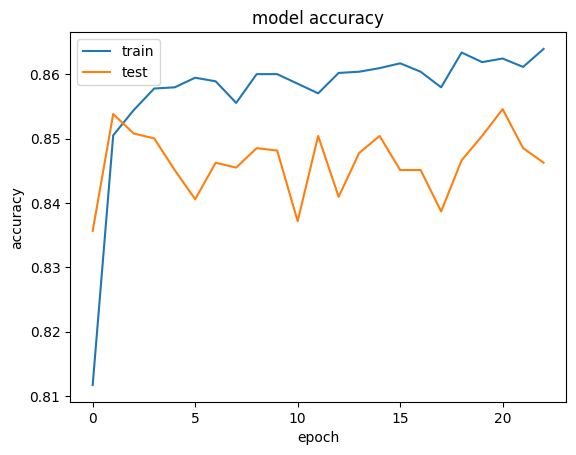

In [37]:

# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

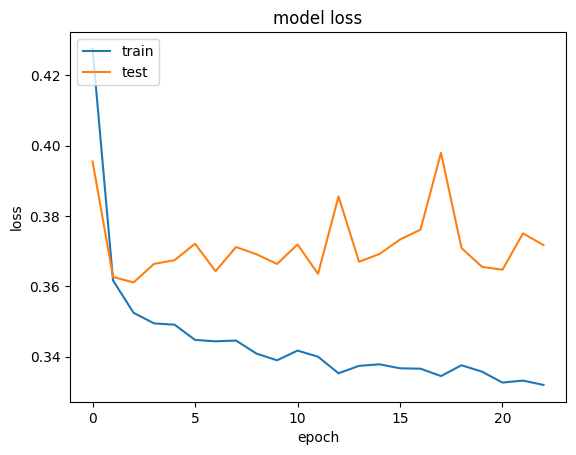

In [38]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [39]:
# Part 3 - Making the predictions and evaluating the model

# Predicting the Test set results
y_pred = classifier.predict(x_test)
y_pred = (y_pred >= 0.5) # whenever greater and equal to 0.5 i am going to take it as 1 or zero

63/63 [==============================] - 0s 2ms/step


In [40]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[1512,   83],
       [ 197,  208]])

In [41]:
# Calculate the Accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)
score

0.86

In [42]:
##Get the weights
classifier.get_weights()

[array([[ 4.9544555e-01, -3.8872007e-01, -1.5900259e-01,  2.8268126e-01,
         -8.4535964e-02, -9.3163341e-01, -3.9986330e-01,  1.7722285e+00,
         -4.3611744e-01, -1.9776072e-01, -2.3456833e-01],
        [-2.3414128e+00,  2.2951343e+00,  3.9849180e-01, -9.7409534e-01,
          1.3887582e+00, -2.0091062e+00, -7.3563173e-02, -5.5576718e-01,
         -1.1292562e+00, -2.6135015e+00,  1.9103962e+00],
        [-4.9186108e-01, -8.5108452e-02,  3.8376409e-01,  6.8346357e-01,
          2.3265792e-01,  7.0980376e-01,  4.3058649e-01,  2.7766314e-01,
         -6.3649707e-02,  1.5401421e-01,  2.4059710e-01],
        [-2.2575951e-01, -7.6784492e-01, -1.5883234e+00, -2.4215975e+00,
          1.7095356e+00, -7.4789959e-01,  7.2827679e-01, -1.0463196e+00,
          1.5330139e-01,  1.6385649e+00, -3.3020800e-01],
        [ 8.9097559e-01, -1.3146073e+00,  2.3864219e+00, -8.2541817e-01,
          5.0620264e-01, -5.6829262e-01,  2.6513872e+00, -2.3483120e-01,
         -6.3654727e-01, -7.7472098e-0

In [46]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [47]:
confusion_matrix(y_pred,y_test)

array([[1512,  197],
       [  83,  208]])

In [55]:
#total accuracy
accuracy_score(y_test,y_pred)

0.86

In [49]:
#detail output
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.95      0.92      1595
           1       0.71      0.51      0.60       405

    accuracy                           0.86      2000
   macro avg       0.80      0.73      0.76      2000
weighted avg       0.85      0.86      0.85      2000

